# Importing the required libraries

In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_json('tops_fashion.json')

In [3]:
print('Number of data-points', data.shape[0])
print('Number of features', data.shape[1])

Number of data-points 183138
Number of features 19


We can see that we have a huge dataset of 183k womens tops data-points

In [4]:
print('All column names:', data.columns)

All column names: Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')


These are the features present for every datapoint(every top) in the dataset

In [5]:
#Getting an overview of the complete dataset
data.head(5)

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


# Selecing which features to keep and what to discard for the problem at hand

In [6]:
data['sku'].unique()

array([None, 'HT-2001_Lime-1149-XL', 'HT-2001_Mint-1450-M', 'F149',
       'HT-2001_Red-1156-XL', 'HT-2001_Lapis-1156-2XL',
       'HT-2001_Lapis-1156-M', 'HT-2001_Mint-1450-L',
       'HT-2001_Turquoise-1156-XL', 'F413', 'HT-2001_Mint-1450-S',
       'HT-2001_LightAqua-1149-2XL', 'HT-2001_Red-1156-2XL',
       'HT-2001_LightBlue-1149-M', 'HT-2001_Raspberry-1156-L',
       'HT-2001_Red-1156-S', 'HT-2001_Mint-1442-L',
       'HT-2001_Mauve-1442-L', 'F1107', 'HT-2001_KellyGreen-1149-L',
       'HT-2001_Lemon-1149-M', 'HT-2001_Mint-1450-2XL',
       'HT-2001_Lime-1442-XL', 'HT-2001_Mauve-1442-M',
       'HT-2001_Mauve-1442-2XL', 'HT-2001_Lime-1442-S',
       'HT-2001_Slate-1156-M', 'HT-2001_Fuchsia-1156-L',
       'HT-2001_Lime-1442-L', 'HT-2001_Fuchsia-1156-2XL',
       'HT-2001_LightAqua-1149-S', 'HT-2001_KellyGreen-1156-S',
       'HT-2001_Raspberry-1156-M', 'HT-2001_Mint-1450-XL',
       'HT-2001_Slate-1156-S', 'HT-2001_Raspberry-1156-XL',
       'HT-2001_RoyalBlue-1156-XL', 'HT-2001_

The 'sku' feature doesn't seem to be that important as it probably is just some size and desc etc

In [7]:
data['asin']

0         B016I2TS4W
1         B01N49AI08
2         B01JDPCOHO
3         B01N19U5H5
4         B004GSI2OS
             ...    
183133    B01MSALTSO
183134    B015W98YQK
183135    B075756PGC
183136    B074L8FVTT
183137    B074FTYJQC
Name: asin, Length: 183138, dtype: object

The 'asin' feature is a primary key to all the products to we keep it as it'll help us differentiate the product in the future

In [8]:
data['product_type_name']

0             SHIRT
1             SHIRT
2             SHIRT
3             SHIRT
4             SHIRT
            ...    
183133    OUTERWEAR
183134        SHIRT
183135        SHIRT
183136        SHIRT
183137        SHIRT
Name: product_type_name, Length: 183138, dtype: object

Already there in title, so we do not need this feature

We only keep medium image URL as later we can train a CNN model on that data

We'll keep color, brand, title, price as those are important.

Discard: publisher', 'availability', 'reviews','large_image_url', 'availability_type', 'small_image_url','editorial_review',

#### Therefore, of the 19 features, we only keep 6 as they seem to be important and discard the rest. These 6 features are:



1. asin  ( Amazon standard identification number)
2. brand ( brand to which the product belongs to )
3. color ( Color information of apparel, it can contain many colors) 
4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
5. medium_image_url  ( url of the image )
6. title (title of the product.)
7. formatted_price (price of the product)

In [9]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [10]:
#looking at the left over dataset
print ('Number of data points : ', data.shape[0],'\n' 
       'Number of features:', data.shape[1])
data.head() 

Number of data points :  183138 
Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# Getting the data ready

### Missing values

###### Basic stats for 'brand'

In [11]:
print(data['brand'].describe())
#There are some missing values and 10.5k unique brands

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [12]:
#Top 10 common brands
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

###### Basic stats for 'color'

In [13]:

print(data['color'].describe())


# we have 7380 unique colors
# 7.2% of products are black in color
# 64956 of 183138 products have color information. That's approx 35.4%.

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [14]:
color_count = Counter(list(data['color']))
color_count.most_common(10)
#Top 10 most common colors
#We do not know what the * stands for

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

###### Basic stats for 'product type name'

In [15]:
# We have total 72 unique type of product_type_names
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [16]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [17]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

###### Basic stats for feature 'title'

In [18]:
print(data['title'].describe())

# All of the products have a title but some titles are repeating as number of unique ones are 175k and not 183k

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


###### Basic stats for feature'formatted_price'

In [19]:
print(data['formatted_price'].describe())

# Only 28,395 (15.5% of whole data) products with price information

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [20]:
data['formatted_price'].isnull().sum()

154743

Thats a lot of missing values in the 'formatted_price' feature which can affect the model in a bad way if we go through with it. So we remove this feature from our model

In [21]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title']]

#We store the data into pickle files so as to create a checkpoint and so that we can start running code directly from here
#the next time instead of running the whole thing. And, if we make any mistake, we can track back to here
data.to_pickle('pickels/180k_apparel_data')

In [22]:
# consider products which have color information

data['color'].isnull().sum()

118182

In [23]:
percentage_missing = (118182/183138)*100
print('Percentage of missing color data:', percentage_missing)

Percentage of missing color data: 64.53166464633227


That's again a huge amount of information lost because of that missing data. So, here in this very case, I took the decision of not dropping the entire column but only dropping the rows which contained this missing data.
Cons of this decision:
1. We lose almost 1/3rd of our data which is a huge hit and can cause performance drops
pros:
1. The system that I'm working on isn't super powerful as many companies would have, so if I was to work with the entire huge dataset, it would take me a lot of time to perform these tasks on the complete dataset. This way I can reduce the computation time that my machine would take on the dataset and be able to complete the project

2. We cannot discard another feature like we did to the price feature as this feature is very important unlike the price
as color forms a major recommender feature

The pros out-weigh the cons here, so it is decided to remove all the rows which contain the missing color value

In [24]:
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])

Number of data points After eliminating color=NULL : 64956


##### Our dataset is brought down from 183k to 64k

In [25]:
#saving this dataset to the pickle file

data.to_pickle('pickels/64k_apparel_data')

## Removing Near-Duplicate items

In [26]:
# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))

3277


In [27]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...
5,B00TAEHGGS,Fitscloth,Grape,https://images-na.ssl-images-amazon.com/images...,SHIRT,[Fits Cloth] Grape Solid Modern Long Sleeve Pl...
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...
8,B06Y2LCC5S,Fashion2ne1,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Standing on His Promises Rhinestones T-Shirt R...
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top


In [28]:
# Remove All products with very few words in title as they wont add value to the model
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 63374


In [29]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title
27547,B073W7P8KK,Nation LTD,Blue,https://images-na.ssl-images-amazon.com/images...,DRESS,❀Nation Women Stripe Blouse Long Sleeve Shirt ...
31277,B01M0PWMZ8,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...
30453,B01M02GWRG,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...
32485,B01N0ADXM0,Anglin,Red,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Fashion Stripe Dress Round Coll...
26767,B01MTQAU86,Anglin,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Autumn Winter Christmas Printin...


In [30]:
print(data_sorted[data_sorted['asin'] == 'B01M0PWMZ8']['title'])

31277    ✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...
Name: title, dtype: object


In [31]:
print(data_sorted[data_sorted['asin'] == 'B01M02GWRG']['title'])

30453    ✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...
Name: title, dtype: object


In the above 2 examples, we see how most of the title is the same but only the end words differ and the difference is seen in the size, as one is Xl and other is XXL.
Such Recommendations could be misleading and give a bad user experience as both are essentially the same product and only differ in sizes

To remove the types of duplicates mentioned above:

In [32]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [33]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])


            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [34]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [35]:
#After removingduplicates which differ only at the end

print('Number of data points : ', data.shape[0])

Number of data points :  48791


In [36]:
data.to_pickle('pickels/48k_apperal_data')

In [37]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...
5,B00TAEHGGS,Fitscloth,Grape,https://images-na.ssl-images-amazon.com/images...,SHIRT,[Fits Cloth] Grape Solid Modern Long Sleeve Pl...
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...
16,B00L3C0O2S,FEA Merchandising,Light,https://images-na.ssl-images-amazon.com/images...,SHIRT,FEA Merchandising Juniors Florida Georgia Line...


We also take into consideration titles who have more than 3 words in common and declare them as duplicates and eliminate them

In [38]:
# This code snippet took 9hrs to run because we are taking each datapoint and comparing with all datapoints
# O(n^2) time.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [39]:
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [40]:
print('Number of data points after stage two of duplicate removal: ',data.shape[0])

Number of data points after stage two of duplicate removal:  44613


In [41]:
data.to_pickle('pickels/44k_apperal_data')

Since this took almost 9hrs to run, we'll save this final leftover data in a pickle file and re-read it when performing furthur tasks

# Text-Preprocessing

In [2]:
data = pd.read_pickle('pickels/44k_apperal_data')

In [28]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [3]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in title like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'didn', 'did', 'before', 'on', "you've", 'was', "mustn't", 'shan', 'while', 'own', 'out', 'y', 'again', 'him', "aren't", 'but', 'those', 'we', 'ain', 'under', 'between', 'herself', 'needn', 'by', 'mightn', 'have', 'both', 've', "couldn't", 'over', 'hadn', 'is', 'mustn', "should've", 'don', 'them', 'ourselves', 'why', 'can', 'm', 'theirs', 'any', "you're", 'themselves', "shan't", 'more', 'very', 'most', "haven't", 'only', 'from', 'now', 'are', 'no', "that'll", 'further', 'wasn', 'their', 'with', 'so', 'they', 'to', 'as', 'in', 'once', 'each', 'yourself', "hasn't", 'her', "wouldn't", 'then', 'such', 'there', 'will', 'my', 'the', 'has', 'll', 'doesn', 'against', 'few', 'aren', "won't", 'been', 'myself', 'he', 'o', 'does', 'she', 'ma', 'during', 'just', 'ours', "don't", 's', 'd', 'about', 'me', 'it', 'you', 'haven', 'an', 'itself', 'be', 'our', "hadn't", 'after', 'at', 'or', 'should', 'i', 'off', 'which', 're', 'hers', 'a', 'yours', 'being', 'yourselves', 't', 'am', 'b

In [4]:
start_time = time.clock() #imported to track time taken since the last data cleaning took almost 9hrs
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

57.8748668 seconds


In [5]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...
16,B00L3C0O2S,FEA Merchandising,Light,https://images-na.ssl-images-amazon.com/images...,SHIRT,fea merchandising juniors florida georgia line...
22,B01KKVZM88,FDPlus,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,sexy open shoulder x long soft shark hemline w...


We can see how there are only important words in title and most stop words are removed

In [6]:
data.shape

data.to_pickle('pickels/44k_apparel_data_preprocessed')

In [7]:
# Some Utility functions which will help us better analyse our output from ML mdels


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
 #plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

# Testing test-based models based on TITLE feature

## 1. Bag of words(bow)

In [3]:
data = pd.read_pickle('pickels/44k_apparel_data_preprocessed')

In [8]:
#One of the most basic models. This acts as a base model so that we can compare to this when dealing with more complex models

from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.

(44613, 22570)

There are 22.5k unique words in the title dataset and 44.6k datapoints
This returns a sparse matrix which contains individual sentences and how many times a word has occured in that sentence

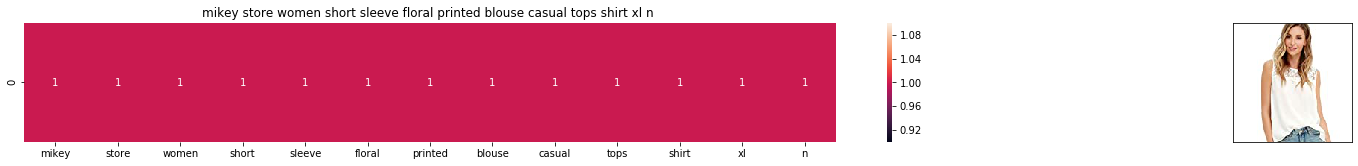

ASIN : B06Y3Y2CY9
Brand: Mikey Store Clothes
Title: mikey store women short sleeve floral printed blouse casual tops shirt xl n 
Euclidean similarity with the query image : 0.0


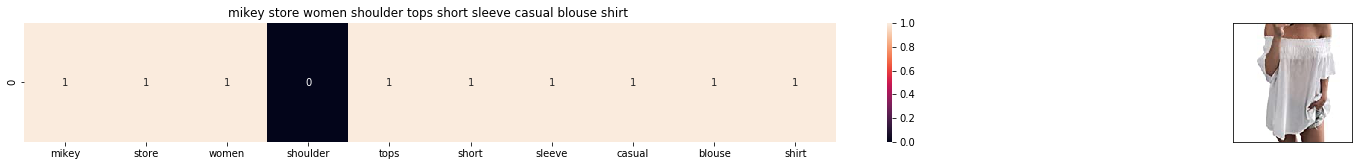

ASIN : B06X94PVBY
Brand: Mikey Store Clothes
Title: mikey store women shoulder tops short sleeve casual blouse shirt 
Euclidean similarity with the query image : 2.0


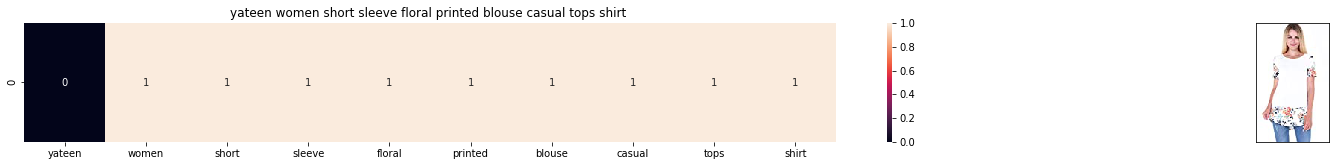

ASIN : B073S2NQZ2
Brand: Yateen
Title: yateen women short sleeve floral printed blouse casual tops shirt 
Euclidean similarity with the query image : 2.0


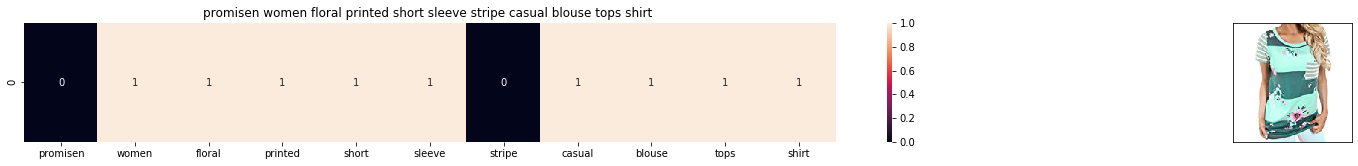

ASIN : B071YQPSWQ
Brand: Promisen
Title: promisen women floral printed short sleeve stripe casual blouse tops shirt 
Euclidean similarity with the query image : 2.23606797749979


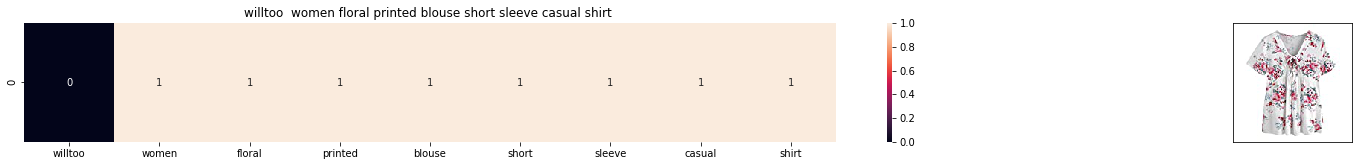

ASIN : B073XL4ZM8
Brand: WILLTOO
Title: willtoo  women floral printed blouse short sleeve casual shirt 
Euclidean similarity with the query image : 2.23606797749979


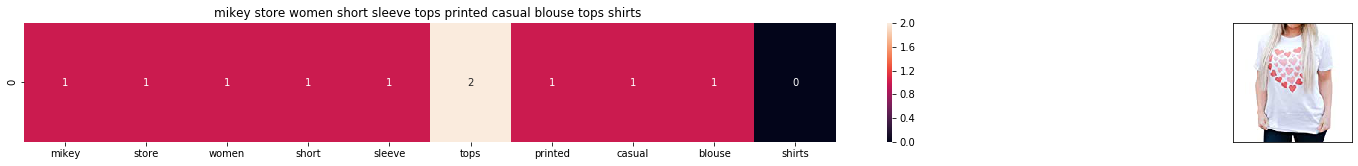

ASIN : B06X6LVTQ4
Brand: Mikey Store Clothes
Title: mikey store women short sleeve tops printed casual blouse tops shirts 
Euclidean similarity with the query image : 2.23606797749979


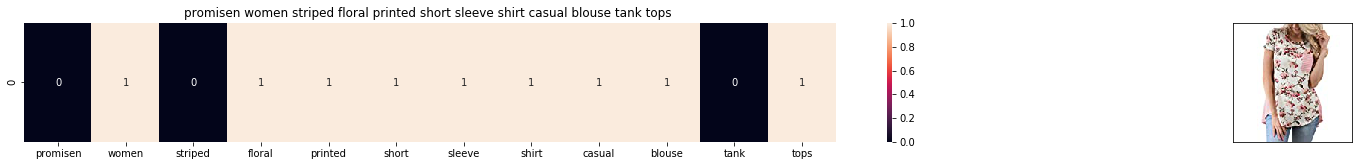

ASIN : B072L7C9LP
Brand: Promisen
Title: promisen women striped floral printed short sleeve shirt casual blouse tank tops 
Euclidean similarity with the query image : 2.449489742783178


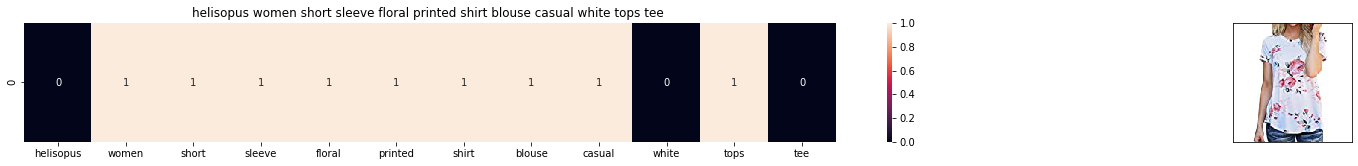

ASIN : B06Y994R56
Brand: Helisopus
Title: helisopus women short sleeve floral printed shirt blouse casual white tops tee 
Euclidean similarity with the query image : 2.449489742783178


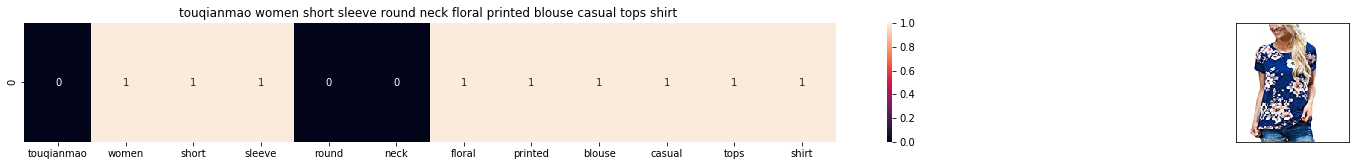

ASIN : B07167RDN6
Brand: TOUQIANMAO
Title: touqianmao women short sleeve round neck floral printed blouse casual tops shirt 
Euclidean similarity with the query image : 2.449489742783178


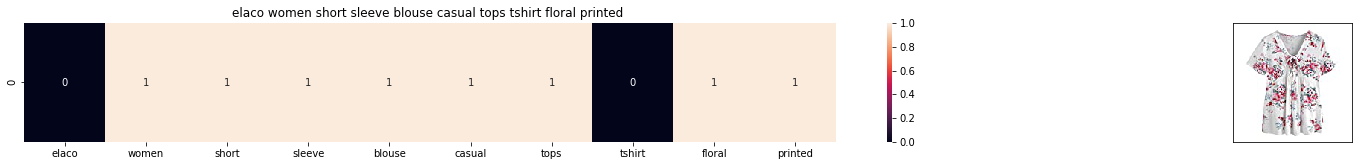

ASIN : B073Z9R43Q
Brand: Elaco
Title: elaco women short sleeve blouse casual tops tshirt floral printed 
Euclidean similarity with the query image : 2.449489742783178


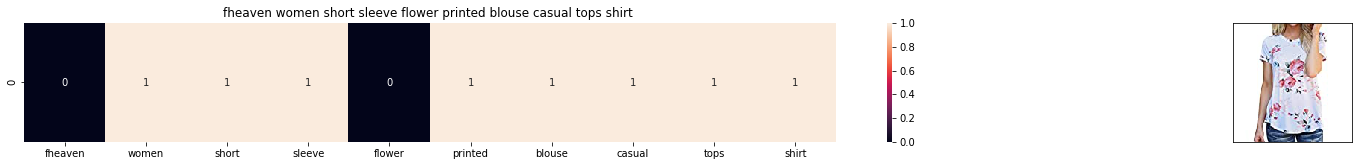

ASIN : B06X9STMKC
Brand: Fheaven
Title: fheaven women short sleeve flower printed blouse casual tops shirt 
Euclidean similarity with the query image : 2.449489742783178


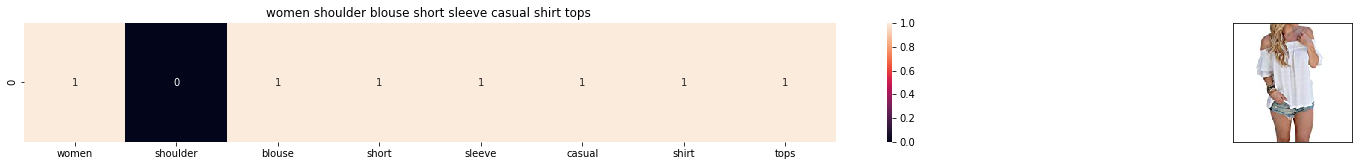

ASIN : B073QKD63V
Brand: Naladoo
Title: women shoulder blouse short sleeve casual shirt tops 
Euclidean similarity with the query image : 2.449489742783178


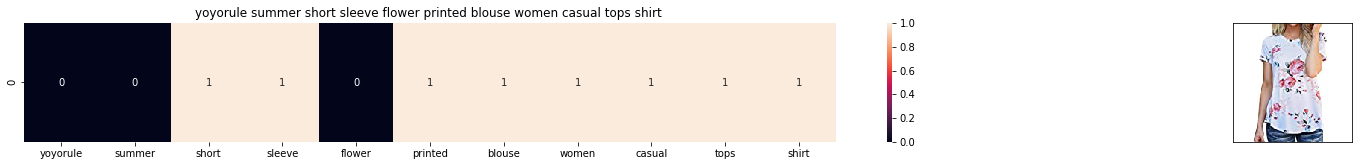

ASIN : B06XX66FDX
Brand: Yoyorule
Title: yoyorule summer short sleeve flower printed blouse women casual tops shirt 
Euclidean similarity with the query image : 2.6457513110645907


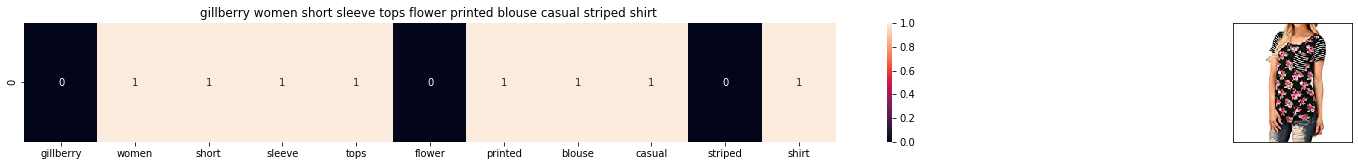

ASIN : B06XP7J983
Brand: Gillberry Women's Blouse
Title: gillberry women short sleeve tops flower printed blouse casual striped shirt 
Euclidean similarity with the query image : 2.6457513110645907


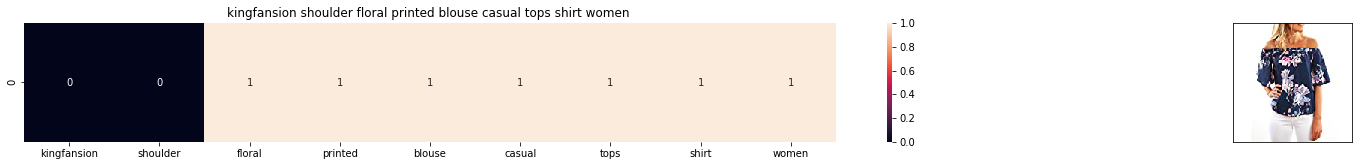

ASIN : B072F391XF
Brand: kingfansion
Title: kingfansion shoulder floral printed blouse casual tops shirt women 
Euclidean similarity with the query image : 2.6457513110645907


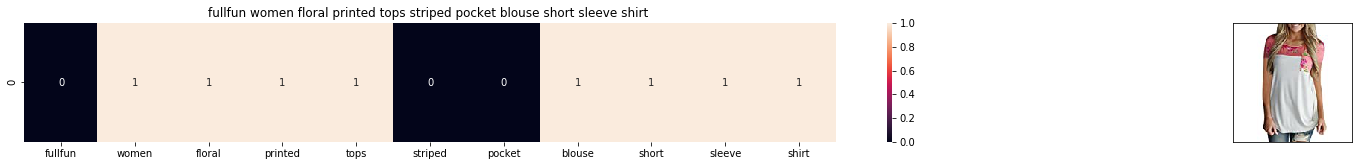

ASIN : B072M7C22Y
Brand: Fullfun
Title: fullfun women floral printed tops striped pocket blouse short sleeve shirt 
Euclidean similarity with the query image : 2.6457513110645907


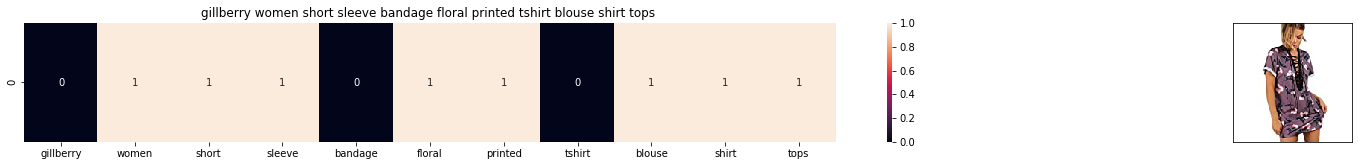

ASIN : B06Y5VK118
Brand: Gillberry Women's Blouse
Title: gillberry women short sleeve bandage floral printed tshirt blouse shirt tops 
Euclidean similarity with the query image : 2.6457513110645907


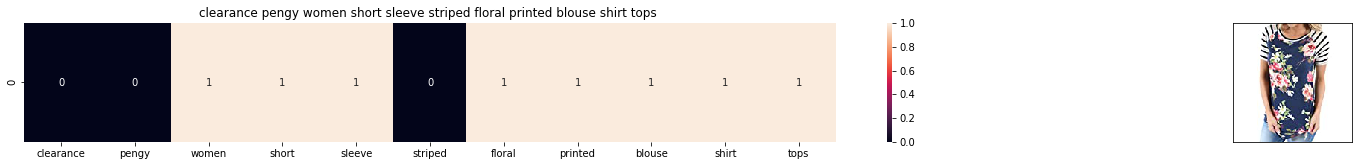

ASIN : B072C899QM
Brand: Pengy
Title: clearance pengy women short sleeve striped floral printed blouse shirt tops 
Euclidean similarity with the query image : 2.6457513110645907


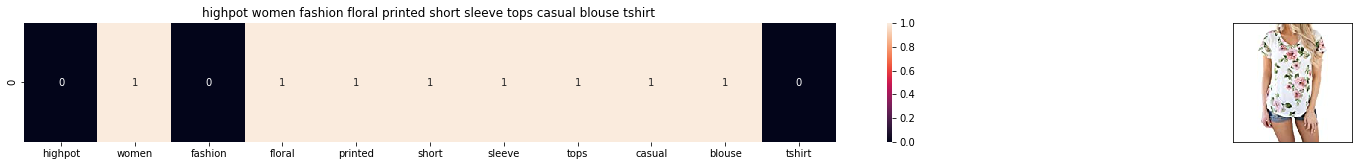

ASIN : B072ZBMH4V
Brand: Highpot
Title: highpot women fashion floral printed short sleeve tops casual blouse tshirt 
Euclidean similarity with the query image : 2.6457513110645907


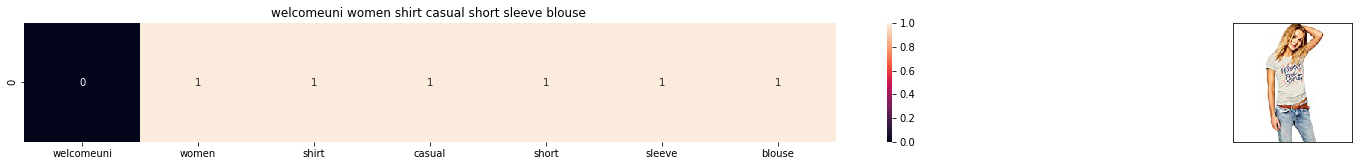

ASIN : B01DD3M0MG
Brand: welcomeuni 1340
Title: welcomeuni women shirt casual short sleeve blouse 
Euclidean similarity with the query image : 2.6457513110645907


In [9]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    #num_results stores the max distance from the initial product so those many recommendations will be shown
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels

    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])#entering the bow matrix which we got
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # passing the required parameters
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)


bag_of_words_model(5426,20) #Taking one randome example to examine as there's no direct loss metric here

We see some decent recommendations by our base model.

It only recommends on the basis of common words. More the common words(lesser the distance) more chances of getting recommended
Except the 2nd recommendation it focuses a lot on floral top designs

Most recommendations are floral based as that's in the title and some are shoulder cut tops

## 2. Tf-idf based similarity

Tf-idf apart from common words similarity also focuses on prioritizing unique words and assigns weights and then gives more
score depending on if a weight is high

In [10]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tfidf_title_features.shape

(44613, 22570)

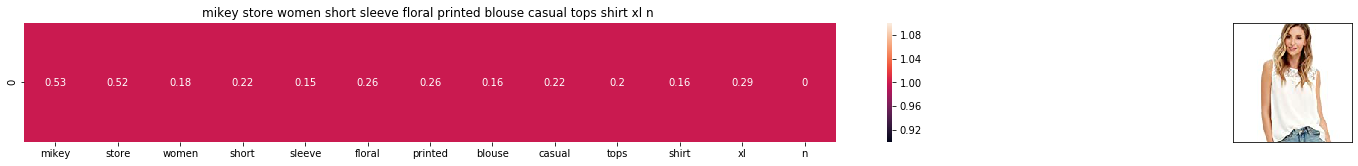

ASIN : B06Y3Y2CY9
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.0


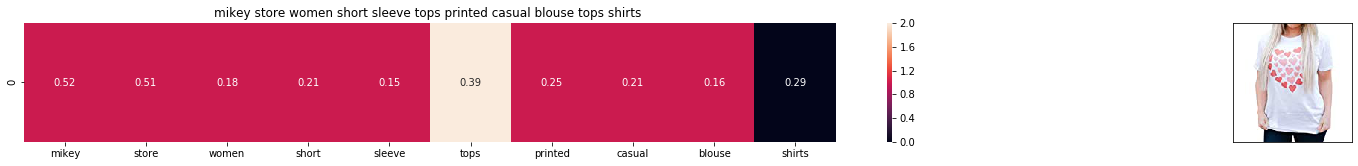

ASIN : B06X6LVTQ4
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.5440171320956912


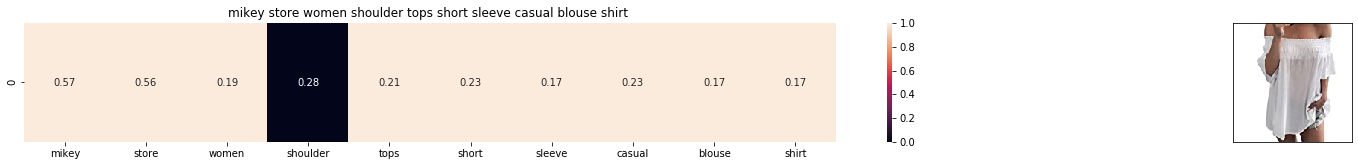

ASIN : B06X94PVBY
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.547722649814777


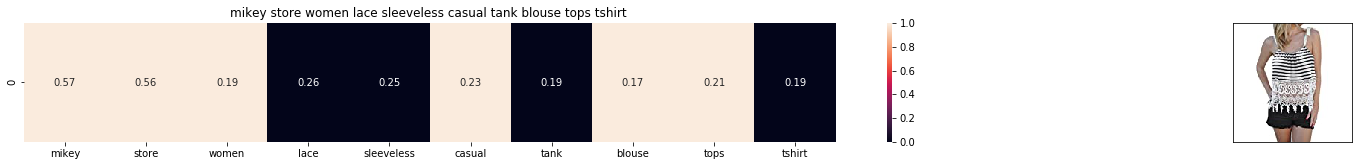

ASIN : B01MYGNJRM
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.7189392067967925


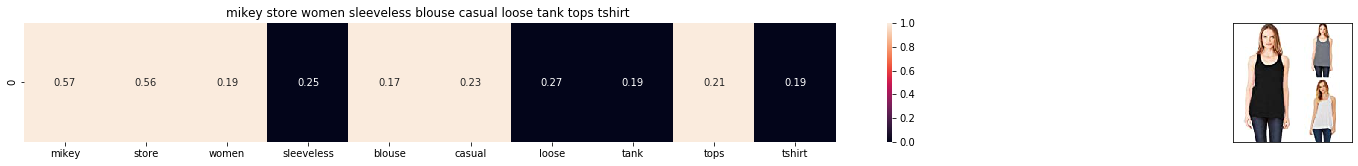

ASIN : B06X42QT8V
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.7216107108731484


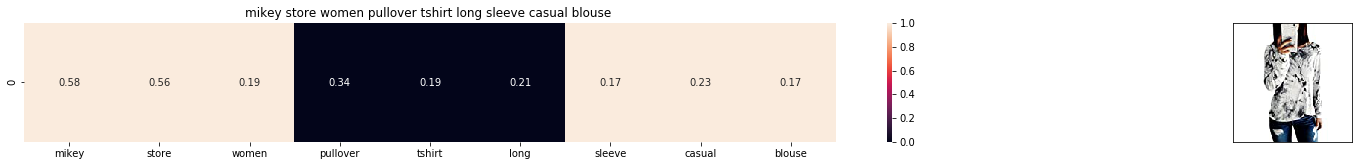

ASIN : B06WGM7DVP
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.7295248364676657


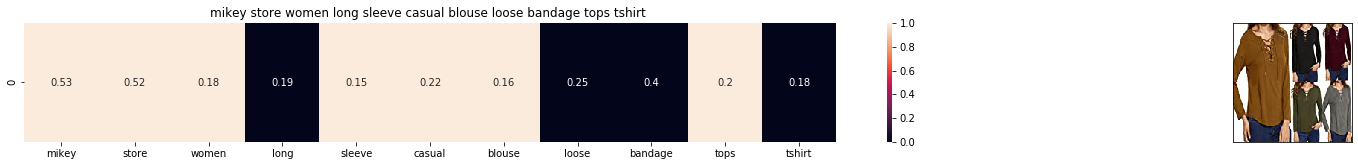

ASIN : B06WWFMXXZ
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.7601297921195957


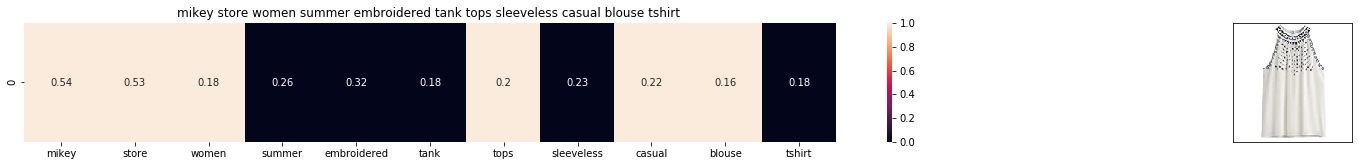

ASIN : B01N19V4YR
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.7739411587437452


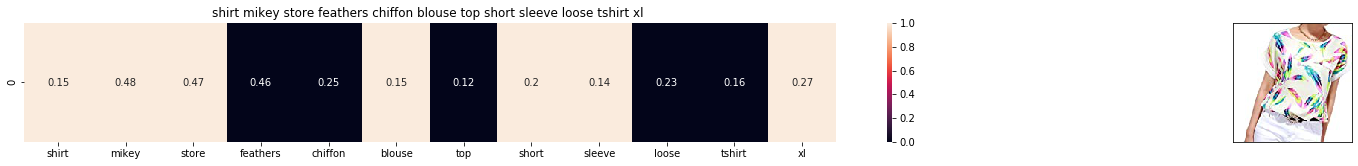

ASIN : B01ER6LX0I
BRAND : Mikey Store
Eucliden distance from the given image : 0.7871580849521522


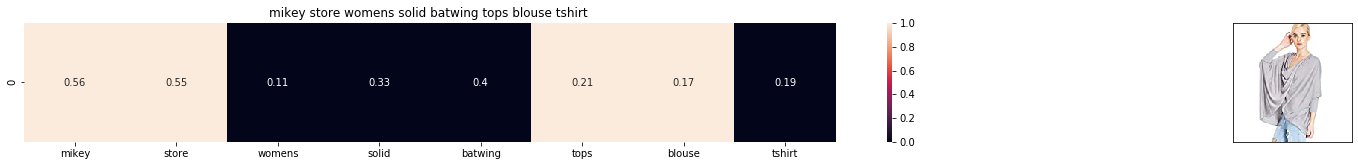

ASIN : B06VS5Z95Z
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.8424925232459144


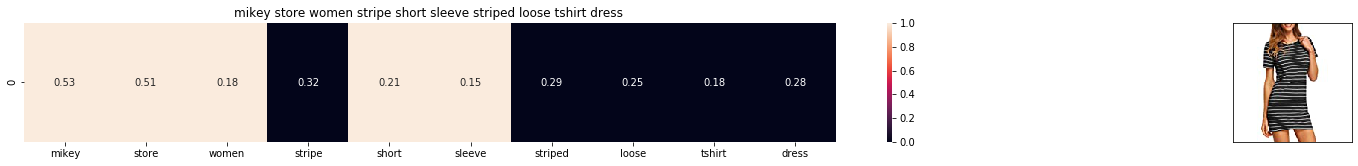

ASIN : B06WD18LVP
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.844174838203703


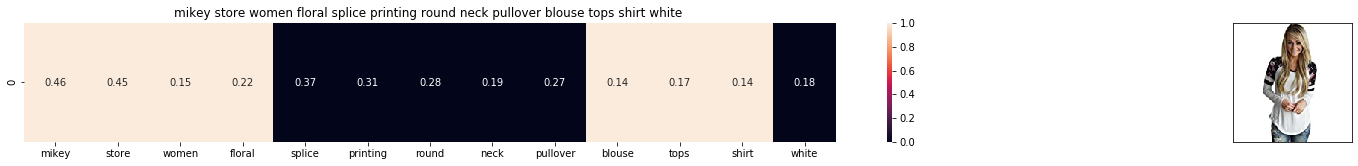

ASIN : B01N53V5RO
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.8572769618444118


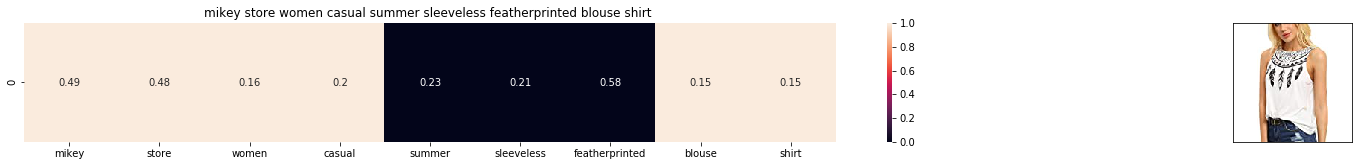

ASIN : B06WP32BZS
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.8709705348771363


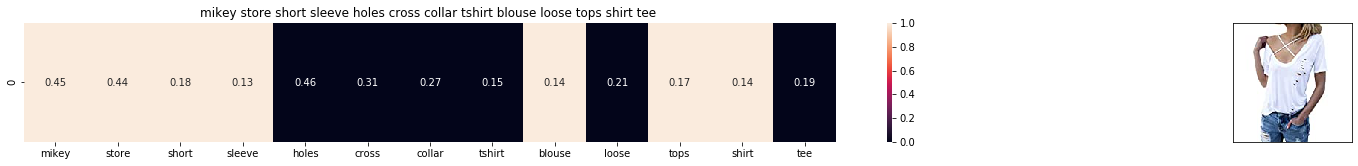

ASIN : B06VXPFPM2
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.8914430390802077


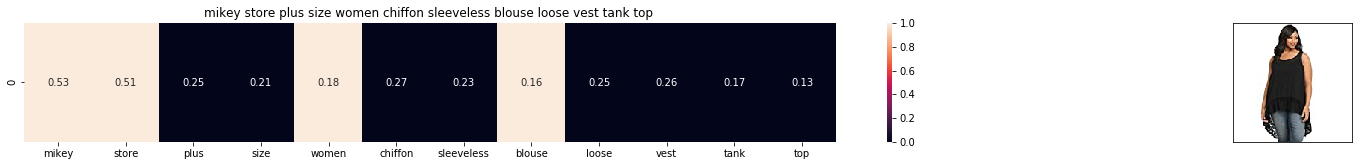

ASIN : B06W9HG4X9
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.8943766530130561


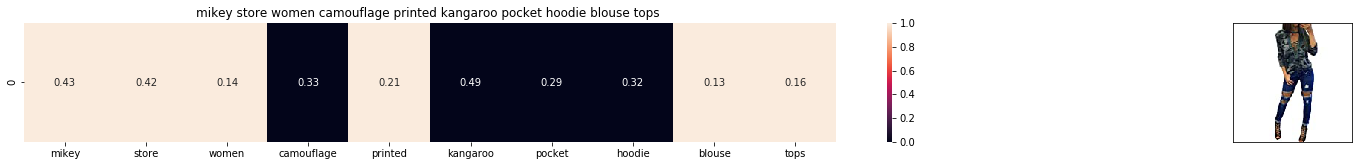

ASIN : B06W51NPX2
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.9217072076999945


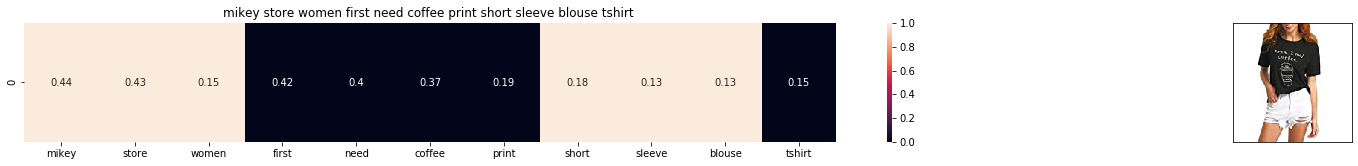

ASIN : B06VW1H9H2
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.9356845452035285


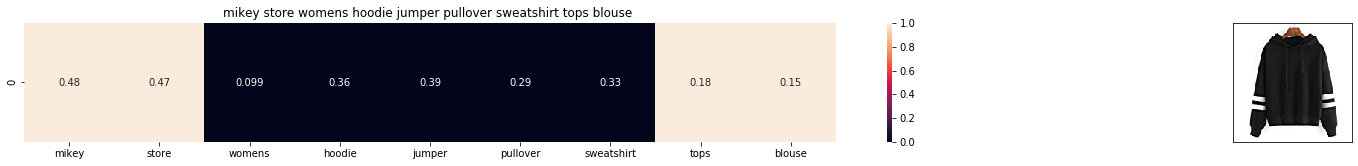

ASIN : B01MRY54HU
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.9390911789458798


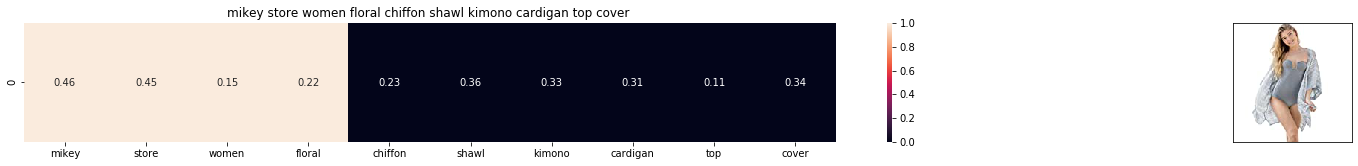

ASIN : B06X9K5HYP
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.941798863455986


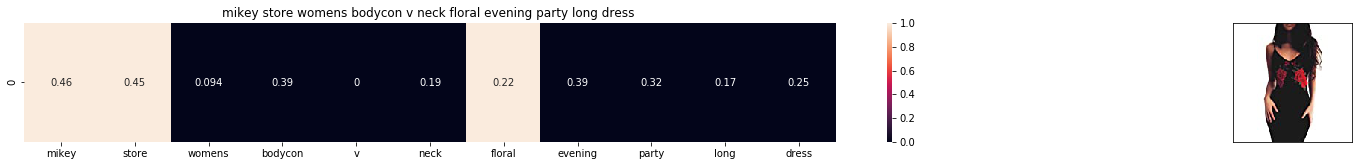

ASIN : B06WRWM51W
BRAND : Mikey Store Clothes
Eucliden distance from the given image : 0.9660457722980206


In [11]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(5426, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

There are some different recommendations here as there are weights assigned to words.
Apart from floral design, we also see more sleeveless designs which are printed

# Advanced techniques - Word2Vec

Word2Vec is a state of the art technique when it comes to text processing and featurization as it assigns values and vectorizes based on the scemantics of the words itself.
This makes it very powerful. We're using a pre-trained Word2Vec model here

In [12]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [13]:
#Some Utility functions which will help us better analyse our output from ML mdels

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))

    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [14]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

### Average W2V product Similarity

In [15]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


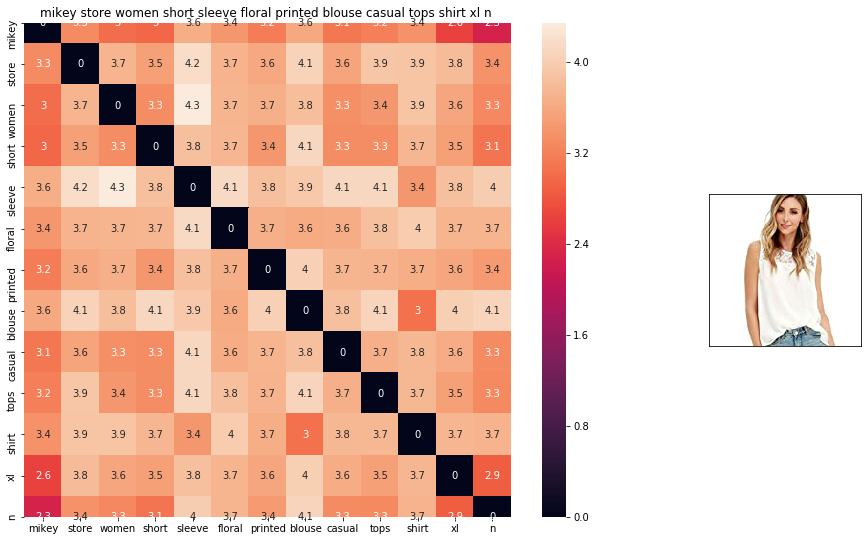

ASIN : B06Y3Y2CY9
BRAND : Mikey Store Clothes
euclidean distance from given input image : 0.0


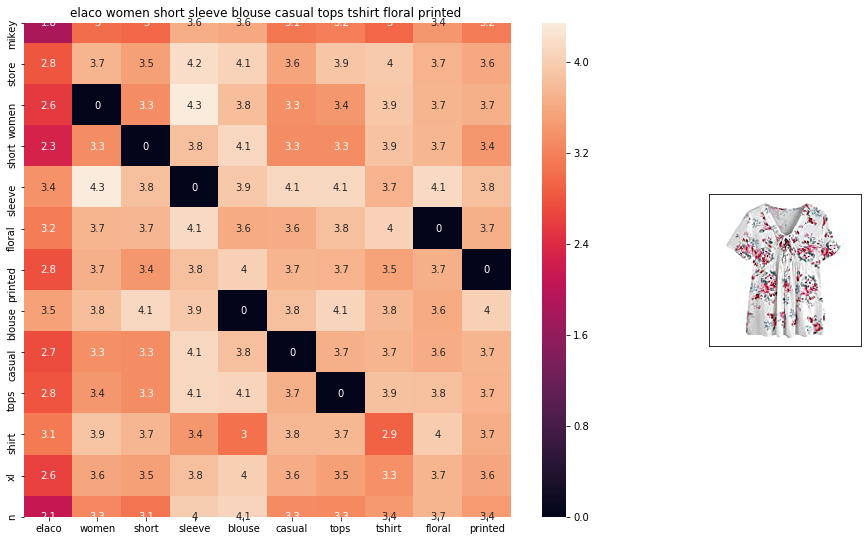

ASIN : B073Z9R43Q
BRAND : Elaco
euclidean distance from given input image : 0.44306517


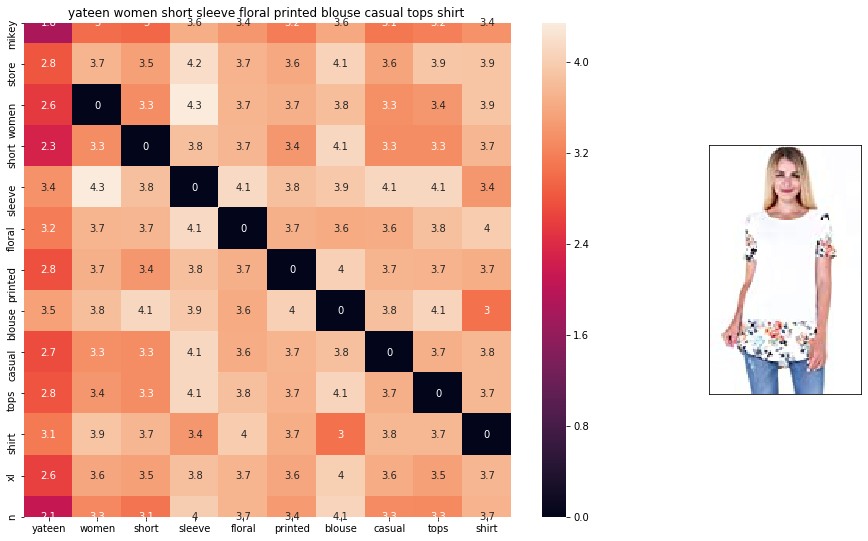

ASIN : B073S2NQZ2
BRAND : Yateen
euclidean distance from given input image : 0.45357528


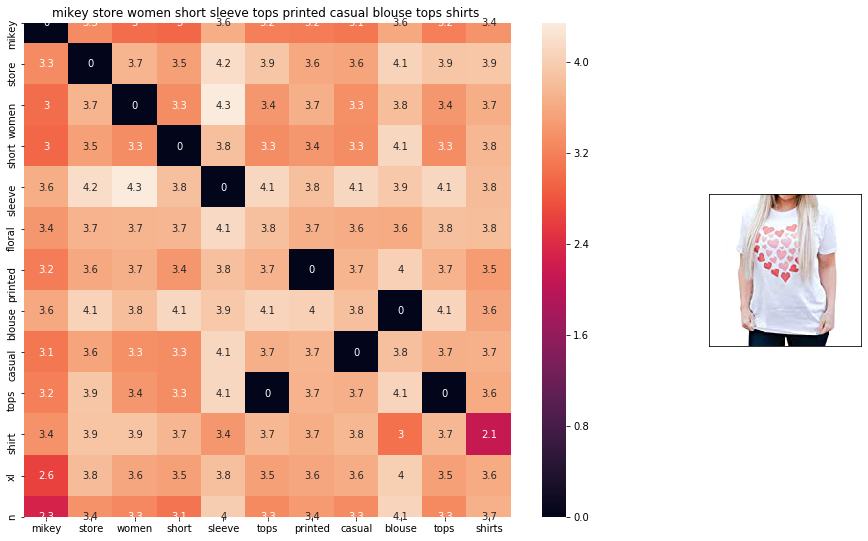

ASIN : B06X6LVTQ4
BRAND : Mikey Store Clothes
euclidean distance from given input image : 0.46364638


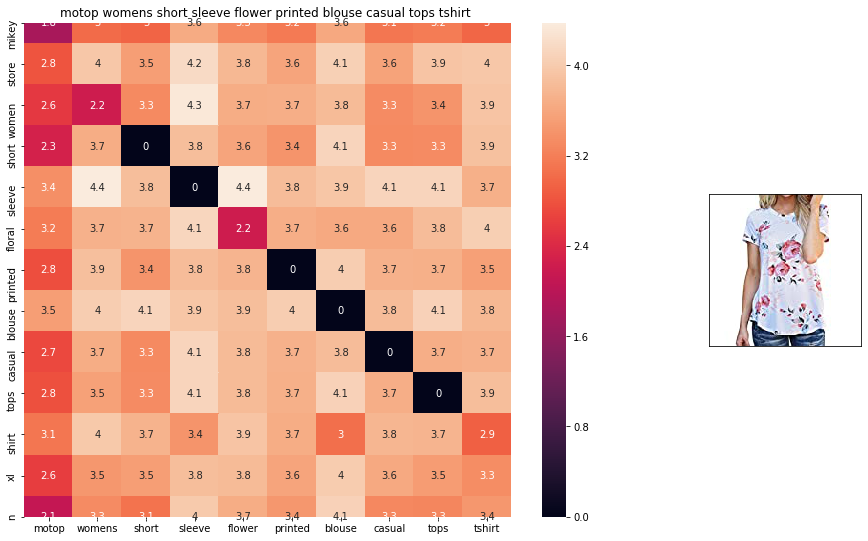

ASIN : B06XBSWCBG
BRAND : Motop
euclidean distance from given input image : 0.48316282


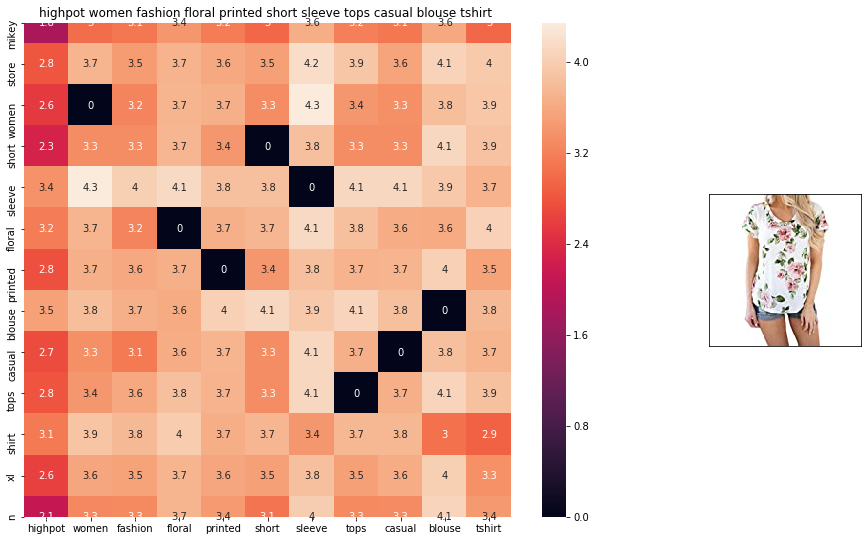

ASIN : B072ZBMH4V
BRAND : Highpot
euclidean distance from given input image : 0.4865613


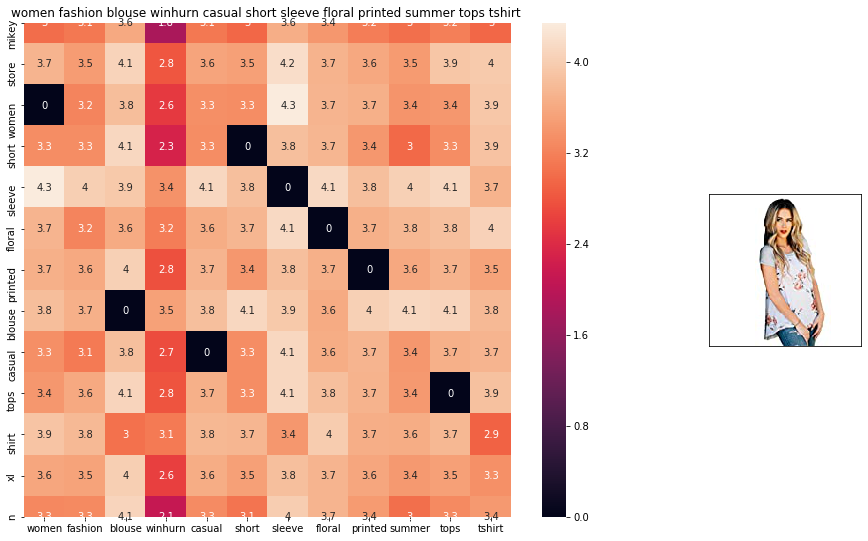

ASIN : B072BX6418
BRAND : Winhurn
euclidean distance from given input image : 0.4879538


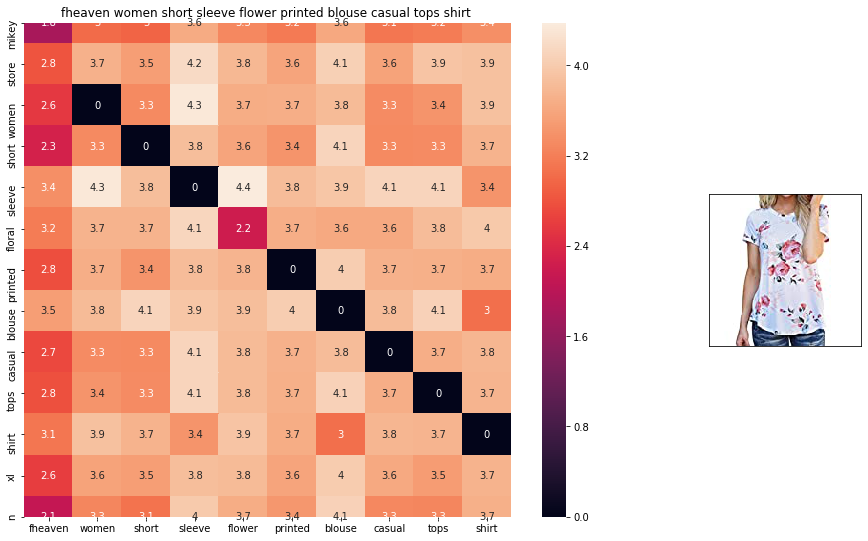

ASIN : B06X9STMKC
BRAND : Fheaven
euclidean distance from given input image : 0.49291107


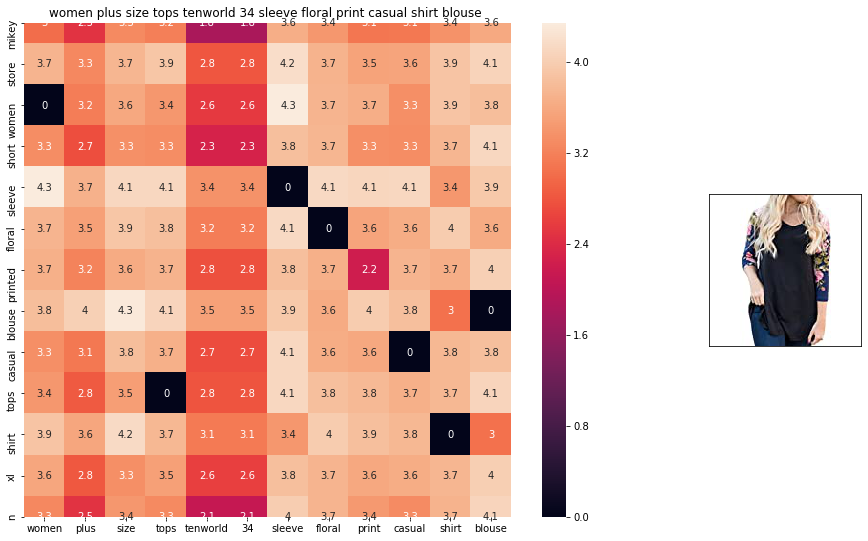

ASIN : B074MQ1ZXW
BRAND : Tenworld
euclidean distance from given input image : 0.4930836


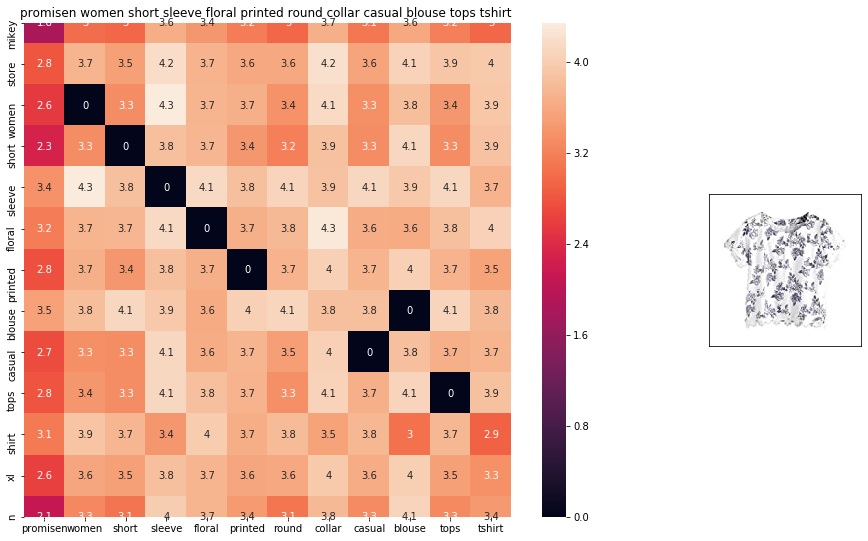

ASIN : B071HVXPT4
BRAND : Promisen
euclidean distance from given input image : 0.5004649


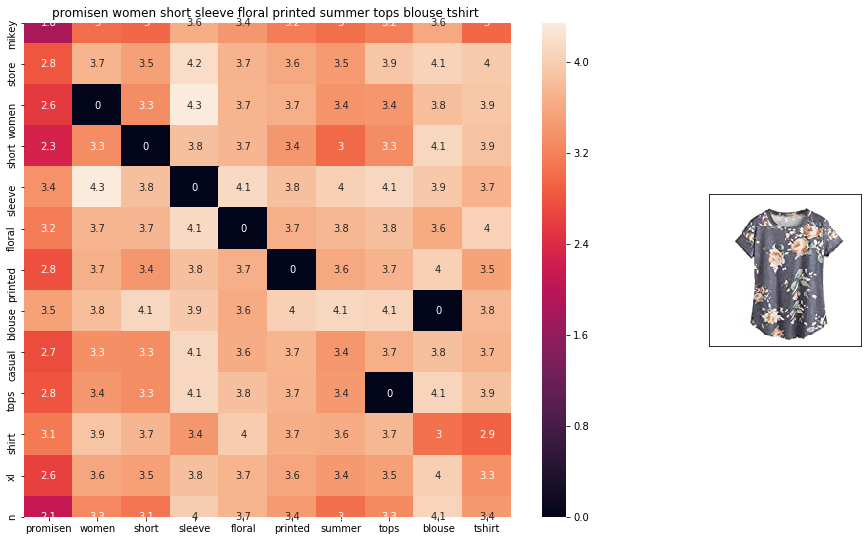

ASIN : B071KP6CD8
BRAND : Promisen
euclidean distance from given input image : 0.50585824


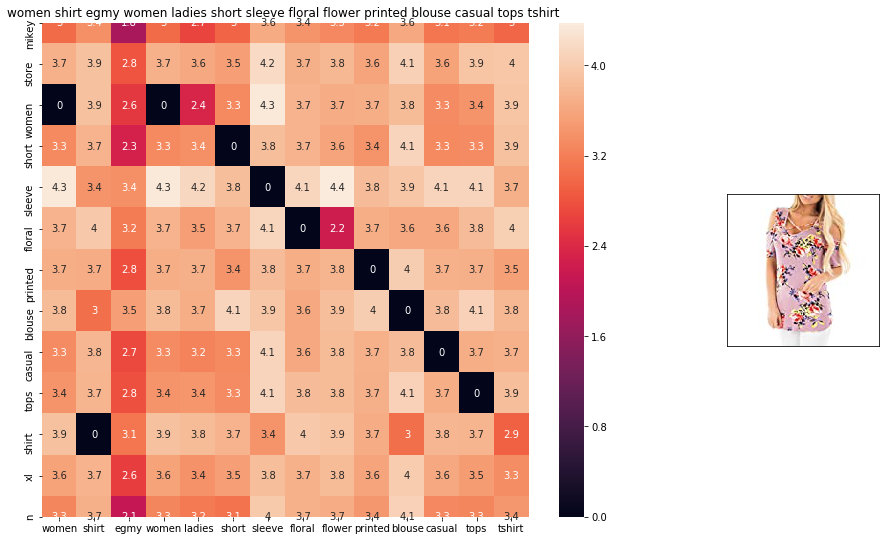

ASIN : B07417W4CY
BRAND : Egmy
euclidean distance from given input image : 0.5103059


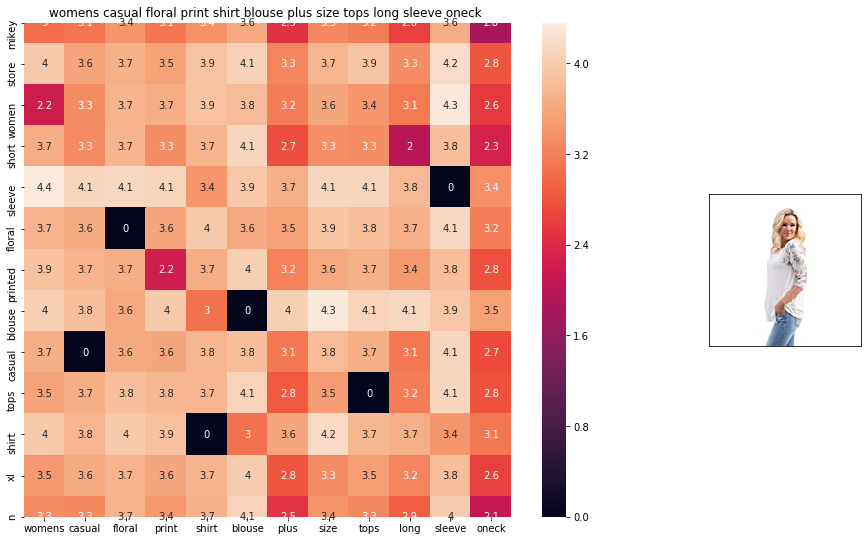

ASIN : B074GT3XC9
BRAND : MALLCAS
euclidean distance from given input image : 0.51103956


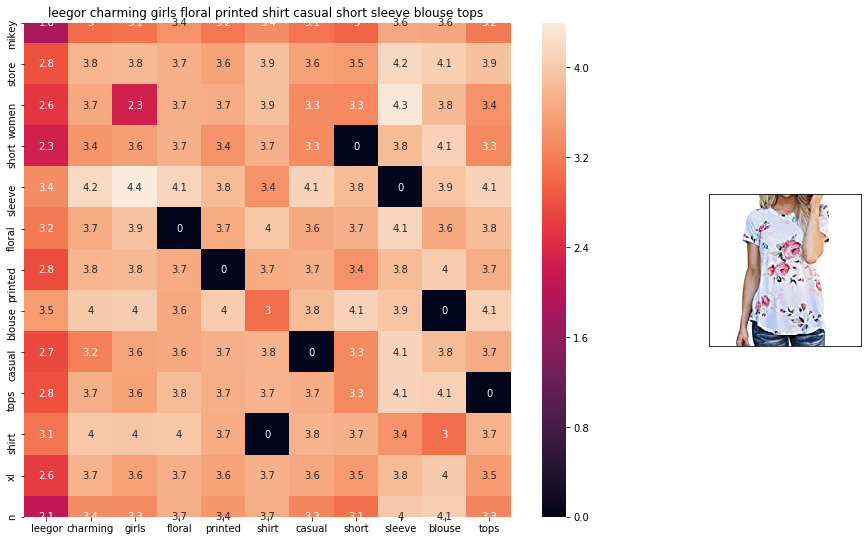

ASIN : B06XKR3SFR
BRAND : Leegor
euclidean distance from given input image : 0.51125413


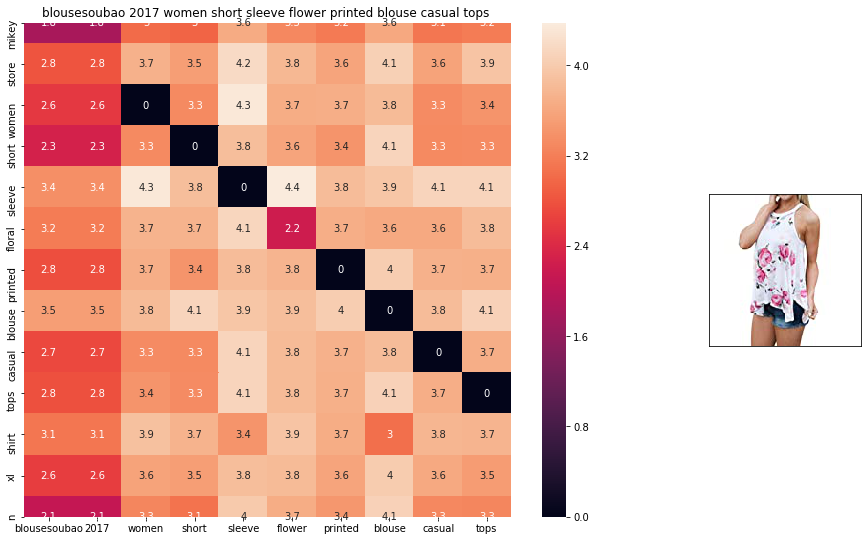

ASIN : B06XBH1FFJ
BRAND : Oubao
euclidean distance from given input image : 0.5146277


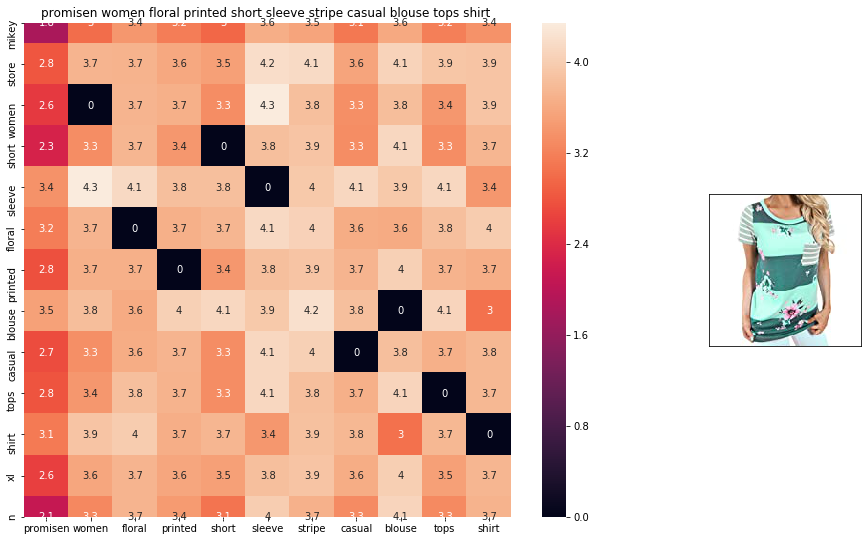

ASIN : B071YQPSWQ
BRAND : Promisen
euclidean distance from given input image : 0.5147805


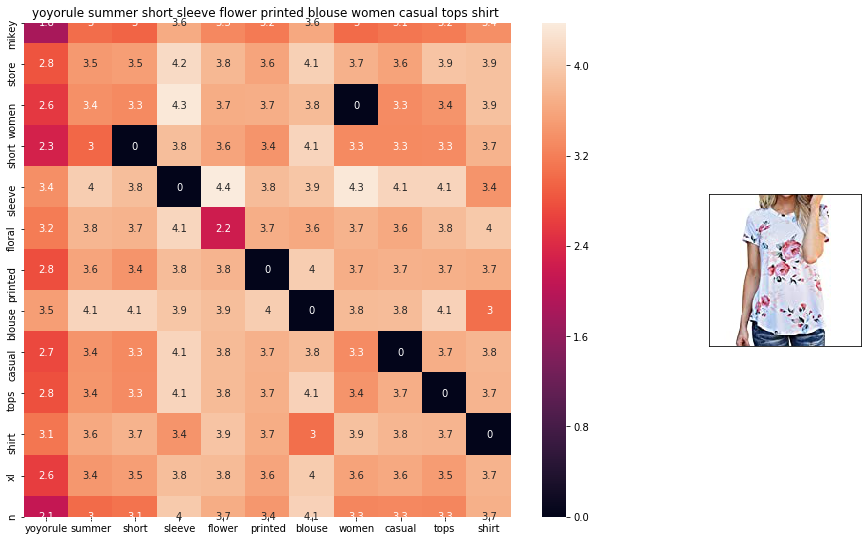

ASIN : B06XX66FDX
BRAND : Yoyorule
euclidean distance from given input image : 0.5174989


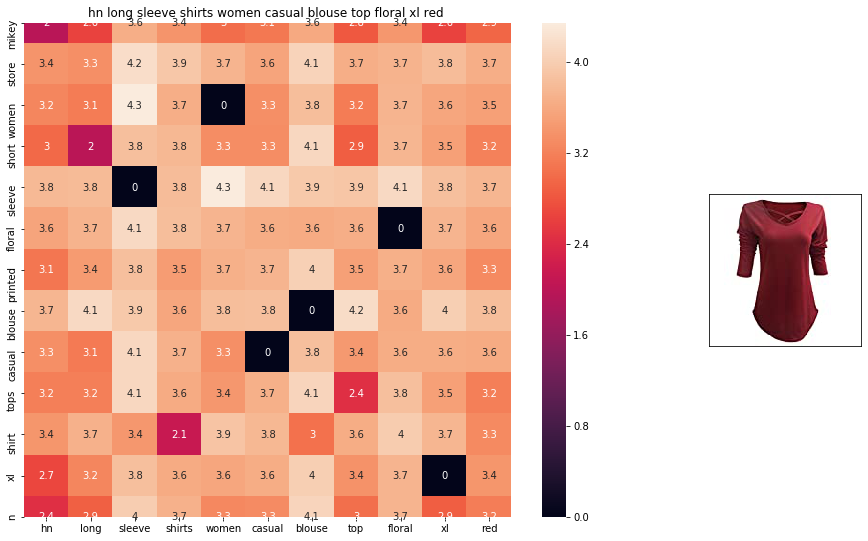

ASIN : B0711KH9DX
BRAND : H&N
euclidean distance from given input image : 0.51813453


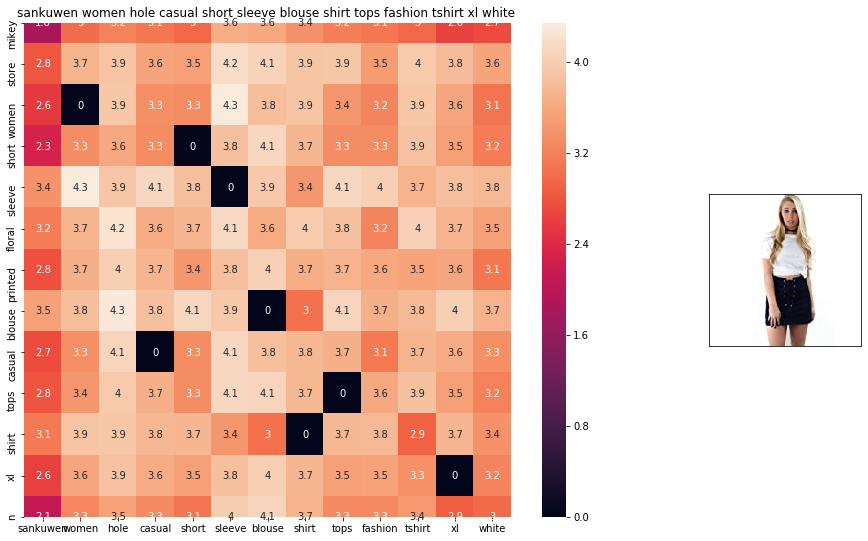

ASIN : B06WWKJTG7
BRAND : Sankuwen
euclidean distance from given input image : 0.52237475


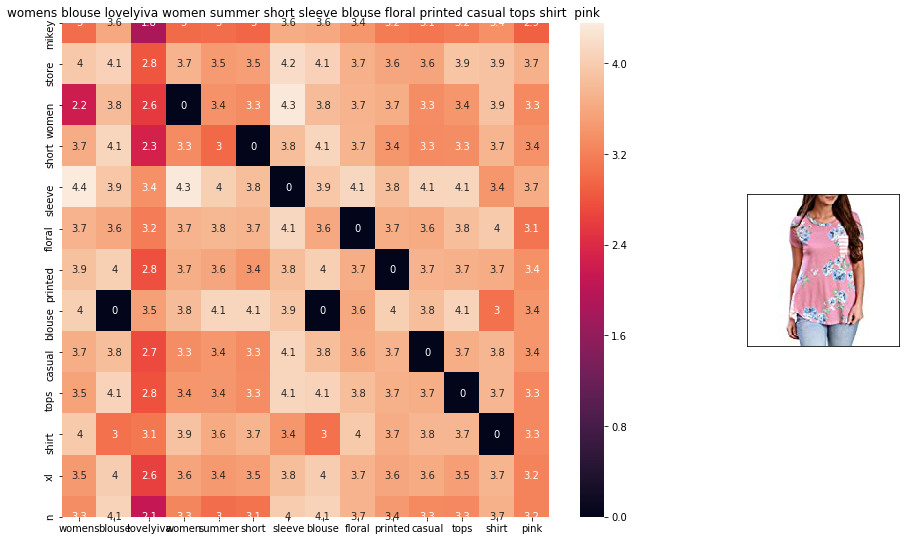

ASIN : B071D8NQJZ
BRAND : LOVELYIVA
euclidean distance from given input image : 0.5229395


In [16]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(5426, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

We see at the start, there are some really good recommendations which have both floral designs and short sleeves
There's a big focus on floral designs

# Using Image detection for recommendation based on apparel pictures

In [23]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

Using TensorFlow backend.


We do not train the data on this local machine because it would take too much time due to big dataset and CNNs take time on low-end machines
So, we will be importing a pre-trained model which was given by appliedaicourse

In [ ]:
#Original code. Not run locally here due to huge runtime. There were only 16k datapoints which were trained on a VGG-16 network
#This obviously increases a lot of overfitting chance but we only have this machine at our disposal
'''
# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'images2/'
nb_train_samples = 16042
epochs = 50
batch_size = 1


def save_bottlebeck_features():
    
    #Function to compute VGG-16 CNN for image feature extraction.
    
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    for i in generator.filenames:
        asins.append(i[2:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))
    
    np.save(open('16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('16k_data_cnn_feature_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()

'''

In [36]:
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
data_cnn = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])

In [37]:
data_cnn.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [38]:
data_cnn[data_cnn['asin'] == 'B06Y3Y2CY9']

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
22878,B06Y3Y2CY9,Mikey Store Clothes,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,mikey store women short sleeve floral printed ...,$8.59


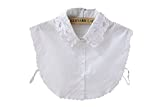

Product Title:  womens embroidery hollow lace fake collar button detachable half shirt false blouse diy tops white 
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B01MG4P338


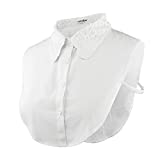

Product Title:  wearlizer faux detachable fake collar womens half shirt blouse hollow white 
Euclidean Distance from input image: 31.310276
Amazon Url: www.amzon.com/dp/B018HQBNP4


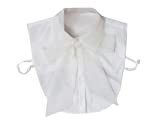

Product Title:  original fashion detachable shirt false collarelegant organza false collar 
Euclidean Distance from input image: 32.04742
Amazon Url: www.amzon.com/dp/B00WQWRLR0


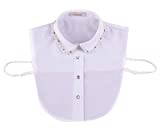

Product Title:  elegant fashion bead detachable shirt false collarwhite 
Euclidean Distance from input image: 32.306286
Amazon Url: www.amzon.com/dp/B00SWR0X4Q


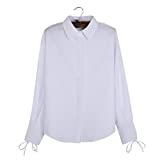

Product Title:  focal20 womens causal shirt stand collar cuffs tied rope fresh blouse tops 
Euclidean Distance from input image: 33.01549
Amazon Url: www.amzon.com/dp/B06XWST7Y8


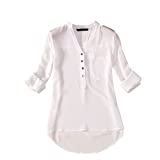

Product Title:  amoin womens vneck chiffon shirt blouse xl white 
Euclidean Distance from input image: 33.080376
Amazon Url: www.amzon.com/dp/B00NNFP216


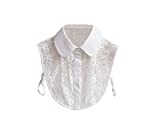

Product Title:  sexy fashion white hollowedout lace detachable shirt false collarcircular bead 
Euclidean Distance from input image: 33.426815
Amazon Url: www.amzon.com/dp/B00NSKF8JM


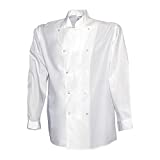

Product Title:  unisex bistro shirt xs whtie 
Euclidean Distance from input image: 33.60069
Amazon Url: www.amzon.com/dp/B0086A5ZUQ


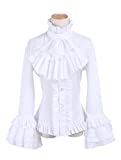

Product Title:  nuoqi women lolita standup collar lotus ruffle shirts white retro victorian blouse gc173bs 
Euclidean Distance from input image: 33.614582
Amazon Url: www.amzon.com/dp/B01N6AH2PP


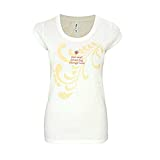

Product Title:  fair trade womens clothing  start small dream big change lives tee  small 
Euclidean Distance from input image: 33.840576
Amazon Url: www.amzon.com/dp/B0733VD61Z


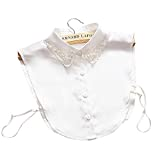

Product Title:  shinywear white pearl false shirt collar princess detachable beads peaked collar 
Euclidean Distance from input image: 33.863834
Amazon Url: www.amzon.com/dp/B01LY2QJI8


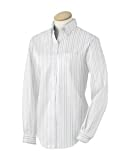

Product Title:  van heusen v0110 ladies longsleeve blended pinpoint oxford  white small 
Euclidean Distance from input image: 33.918217
Amazon Url: www.amzon.com/dp/B001E0H8D2


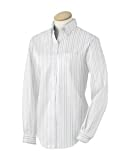

Product Title:  van heusen ladies wrinkleresistant blended pinpoint oxford xl english blue 
Euclidean Distance from input image: 33.918217
Amazon Url: www.amzon.com/dp/B001E0J15A


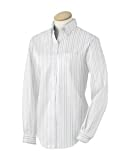

Product Title:  van heusen v0110 ladies longsleeve blended pinpoint oxford  english blue small 
Euclidean Distance from input image: 33.918217
Amazon Url: www.amzon.com/dp/B001E0DBYW


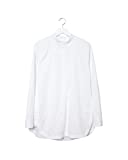

Product Title:  proenza schouler white mandarin collar tunic 4 
Euclidean Distance from input image: 34.046574
Amazon Url: www.amzon.com/dp/B074TY2L9H


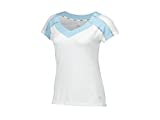

Product Title:  womens flirty cap sleeve top white xsmall 
Euclidean Distance from input image: 34.06336
Amazon Url: www.amzon.com/dp/B00U7PRVEG


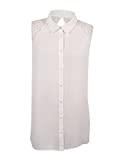

Product Title:  city chic womens trendy plus size laceback blouse xxl24w ivory 
Euclidean Distance from input image: 34.078465
Amazon Url: www.amzon.com/dp/B074Q331SN


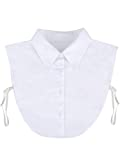

Product Title:  eboot fake collar detachable dickey collar blouse half shirts false collar girls women white 
Euclidean Distance from input image: 34.08766
Amazon Url: www.amzon.com/dp/B01N230VOY


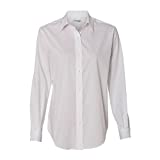

Product Title:  van heusen 13v0395 womens long sleeve resin finish oxford shirt white medium 
Euclidean Distance from input image: 34.13525
Amazon Url: www.amzon.com/dp/B01N1PXEHD


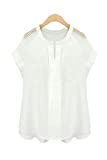

Product Title:  unomatch women loose plus size lace decorated sleeves blouse white 20 white 
Euclidean Distance from input image: 34.236248
Amazon Url: www.amzon.com/dp/B06VSFTRBS


In [40]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo


#get similar products using CNN features (VGG-16)
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(5426, 20)

# Conclusions

We see here that the all of a sudden the base image and the recommendations have changed. This is due to the short dataset that the model was trained on
The datapoint that we were working with got shuffled and relocated somewhere in the dataset and is very difficult to find out the exact top that we were working with.
Hence, the images are misplaced. But, the moto was just to implement a CNN model on this data.


At the end, recommendations depend a lot on buisness stratagy and the company's policy too so that is kept in mind when it is deployed in the real world.

We took 2 approaches here which is the NLP method where we did all text based featurizations and tasks and recommended based on that and the other was using computer vision through CNNs
At the end, we can store these recommendations on a set dataframe(to avoid duplicate recommendations) and then select the top 5-10 and show it to the customer

This was a content-filtering based recommender system and not collaborative since we had the data about the title, picture, brand etc

For collaborative-filtering, we need user-data and item data to form user-user and itme-item similarity matrix for Matrix Factorization.

This user-data isn't shared by companies and is protected very well

At the end, to see how the model is performing , there is no loss function like the supervised learning techniques but we can perform A/B testing which will give us some solid feedbacks

At the end, i would like to thank Appliedai which helped a lot with providing data, some code-debugging and Verma sir who was a guide throughout the project and really put all concepts well together.